In [1]:
from utils.build_evaluation_sets import buildSet
from utils.build_vocab import simLex
from utils.word_2_vec import Word2Vec
from utils.tfidf import tfidf
from utils.evaluation import Evaluation
from utils.plot import plot
import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('brown')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

In [2]:
#A sample run using 10 iterations
corpus_raw, corpora = buildSet.getCorpus(corpus_list = ['news', 'romance'])
similarity_dict = simLex.getSimDict()
top_k_g = simLex.formTop_k_g(similarity_dict, k = 10)
w2v_models = Word2Vec.buildWord2vecModels(corpora, context_windows = [1, 2, 5, 10], vector_sizes = [10, 50, 100, 300], iterations = 10)
top_k_g_w2v = Evaluation.evaluateWord2Vec(similarity_dict, w2v_models)
top_k_g_tfidf = tfidf.tfidf_models(corpus_raw, similarity_dict)
nDCG_w2v = Evaluation.get_nDCG(top_k_g_w2v, top_k_g)
nDCG_tfidf = Evaluation.get_nDCG(top_k_g_tfidf, top_k_g)
best = plot.compareWithBestModels(nDCG_w2v, nDCG_tfidf)

Training on corpus:  news
Training Word2Vec with window : 1 and vector size : 10
Word2Vec_window_1_vector_size_10_news is done.
Training Word2Vec with window : 1 and vector size : 50
Word2Vec_window_1_vector_size_50_news is done.
Training Word2Vec with window : 1 and vector size : 100
Word2Vec_window_1_vector_size_100_news is done.
Training Word2Vec with window : 1 and vector size : 300
Word2Vec_window_1_vector_size_300_news is done.
Training Word2Vec with window : 2 and vector size : 10
Word2Vec_window_2_vector_size_10_news is done.
Training Word2Vec with window : 2 and vector size : 50
Word2Vec_window_2_vector_size_50_news is done.
Training Word2Vec with window : 2 and vector size : 100
Word2Vec_window_2_vector_size_100_news is done.
Training Word2Vec with window : 2 and vector size : 300
Word2Vec_window_2_vector_size_300_news is done.
Training Word2Vec with window : 5 and vector size : 10
Word2Vec_window_5_vector_size_10_news is done.
Training Word2Vec with window : 5 and vector siz

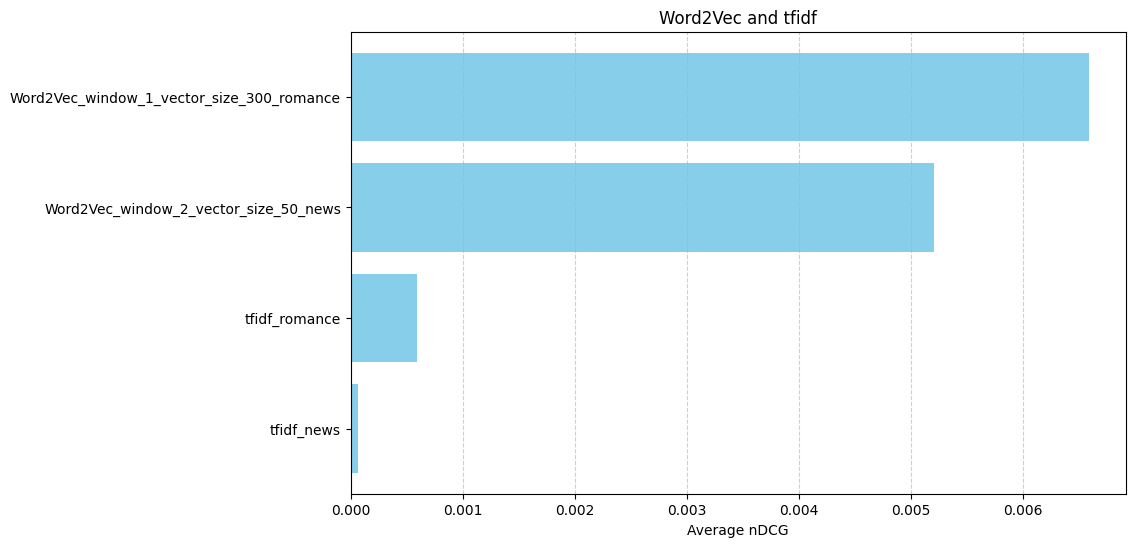

In [3]:
plot.visualize_nDCG_scores(best, graph_label = 'Word2Vec and tfidf')